In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('ticks', {'axes.grid': False})
sns.set_context("paper", font_scale=1.2, rc={'lines.markersize': 8})

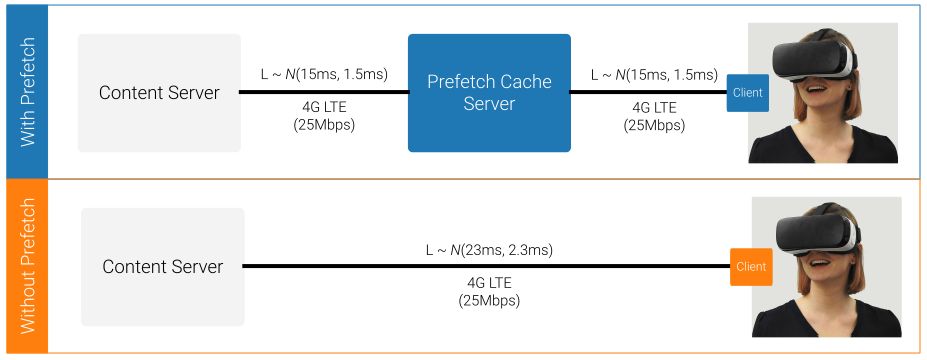

In [2]:
from IPython.display import SVG, display
display(SVG('./Explora-VR-RespTime-Setup.svg'))

In [3]:
LOGS_PATH = './logs'
VIDEO_LIST = [0,2,4]
K_LIST = [1,3,5,7,9]
USER_LIST = [25, 27, 28, 38, 41, 44]
QUALITIES = [1, 2, 3, 4, 5]
PREFETCH_FILE_TMPL = 'log_seg_u{user}_prefetch.txt'
NO_PREFETCH_FILE_TMPL = 'log_seg_u{user}_no_prefetch.txt'

results_list = []
prefetch_flag = False

for k in K_LIST:
    for q in QUALITIES:
        for v in VIDEO_LIST:
            for u in USER_LIST:
                for file_tmpl in [PREFETCH_FILE_TMPL, NO_PREFETCH_FILE_TMPL]:
                    prefetch_flag = not prefetch_flag
                    with open(f'{LOGS_PATH}/logs_k{k}/{q}/{v}/{file_tmpl.format(user=u)}', 'r') as p_file:
                        p_times = [float(t.strip()) for t in p_file.readlines()]
                        p_df = pd.DataFrame(columns=['video', 'quality', 'user', 'prefetch', 'k', 'seg_resp_time'])
                        p_df['seg_resp_time'] = p_times
                        p_df['video'] = v
                        p_df['quality'] = q
                        p_df['user'] = u
                        p_df['prefetch'] = prefetch_flag
                        p_df['k'] = k
                        results_list.append(p_df)
                
results_df = pd.concat(results_list, ignore_index=True)

In [4]:
results_df

,video,quality,user,prefetch,k,seg_resp_time
0,0,1,25,True,1,0.231624
1,0,1,25,True,1,0.212974
2,0,1,25,True,1,0.211515
3,0,1,25,True,1,0.210770
4,0,1,25,True,1,0.215906
...,...,...,...,...,...,...
89995,4,5,44,False,9,1.466963
89996,4,5,44,False,9,2.000583
89997,4,5,44,False,9,1.654453
89998,4,5,44,False,9,1.912657


In [5]:
k_unique = results_df['k'].unique().tolist()
v_unique = results_df['video'].unique().tolist()

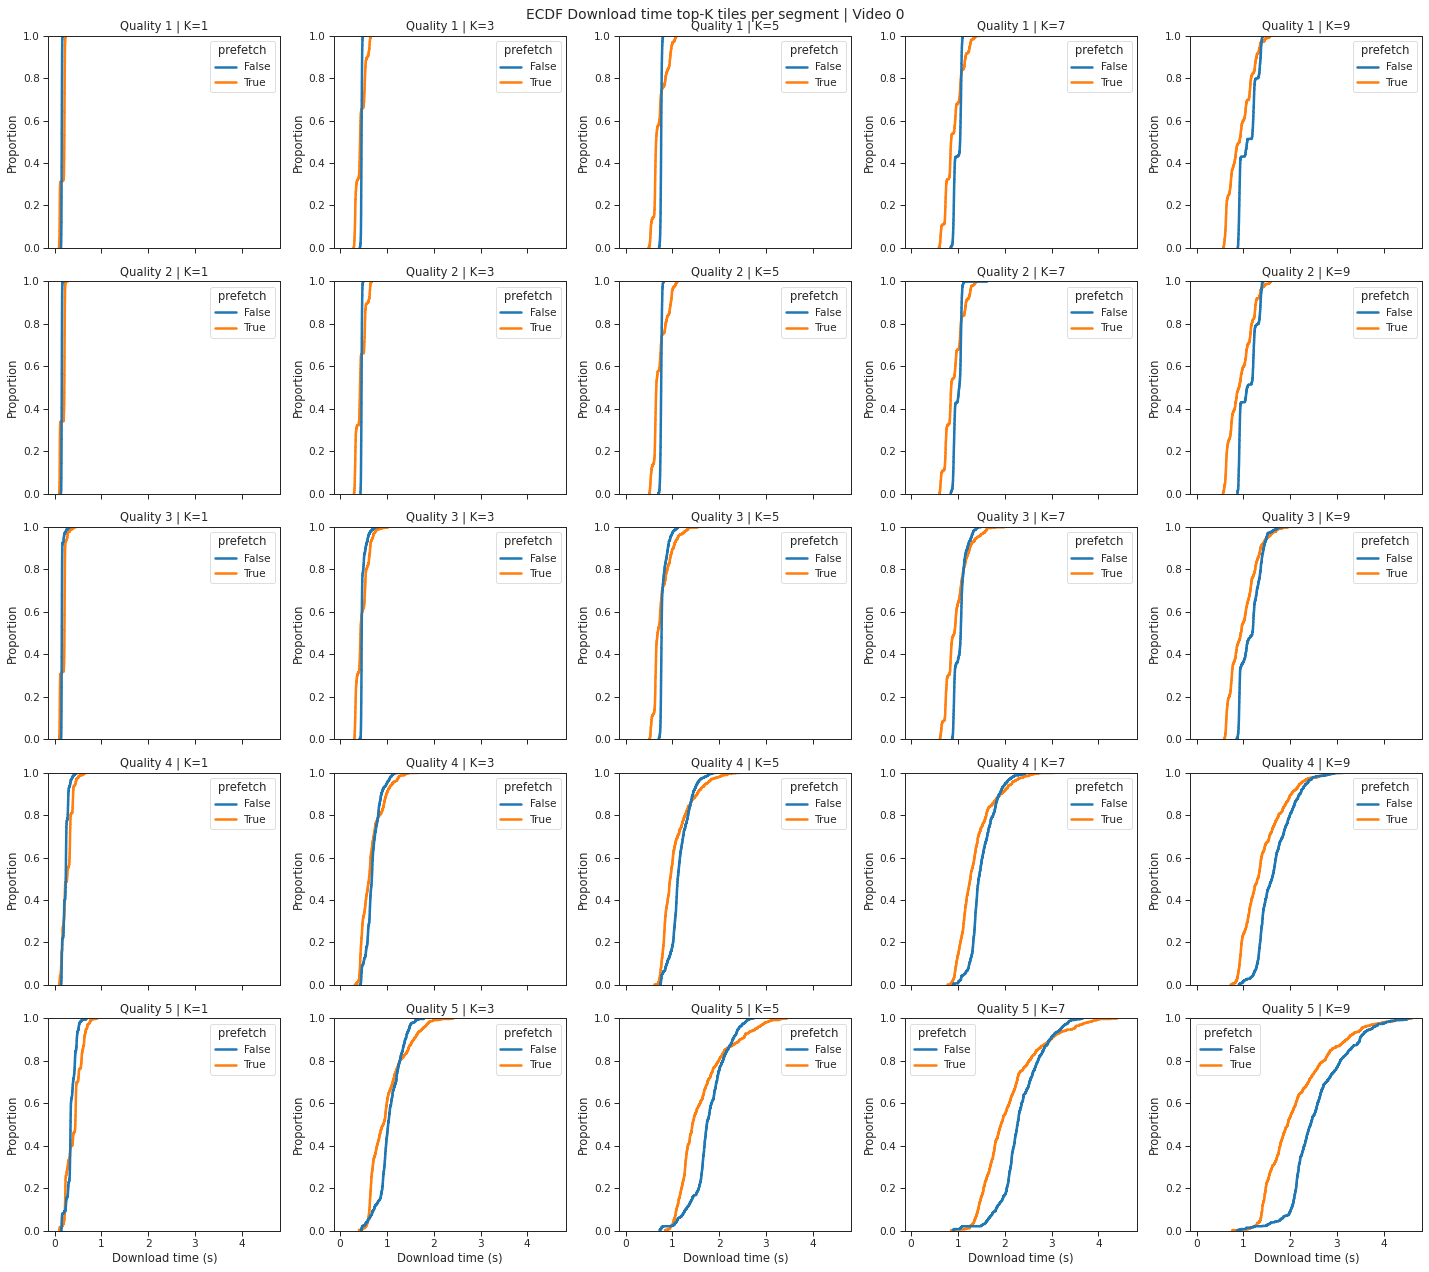

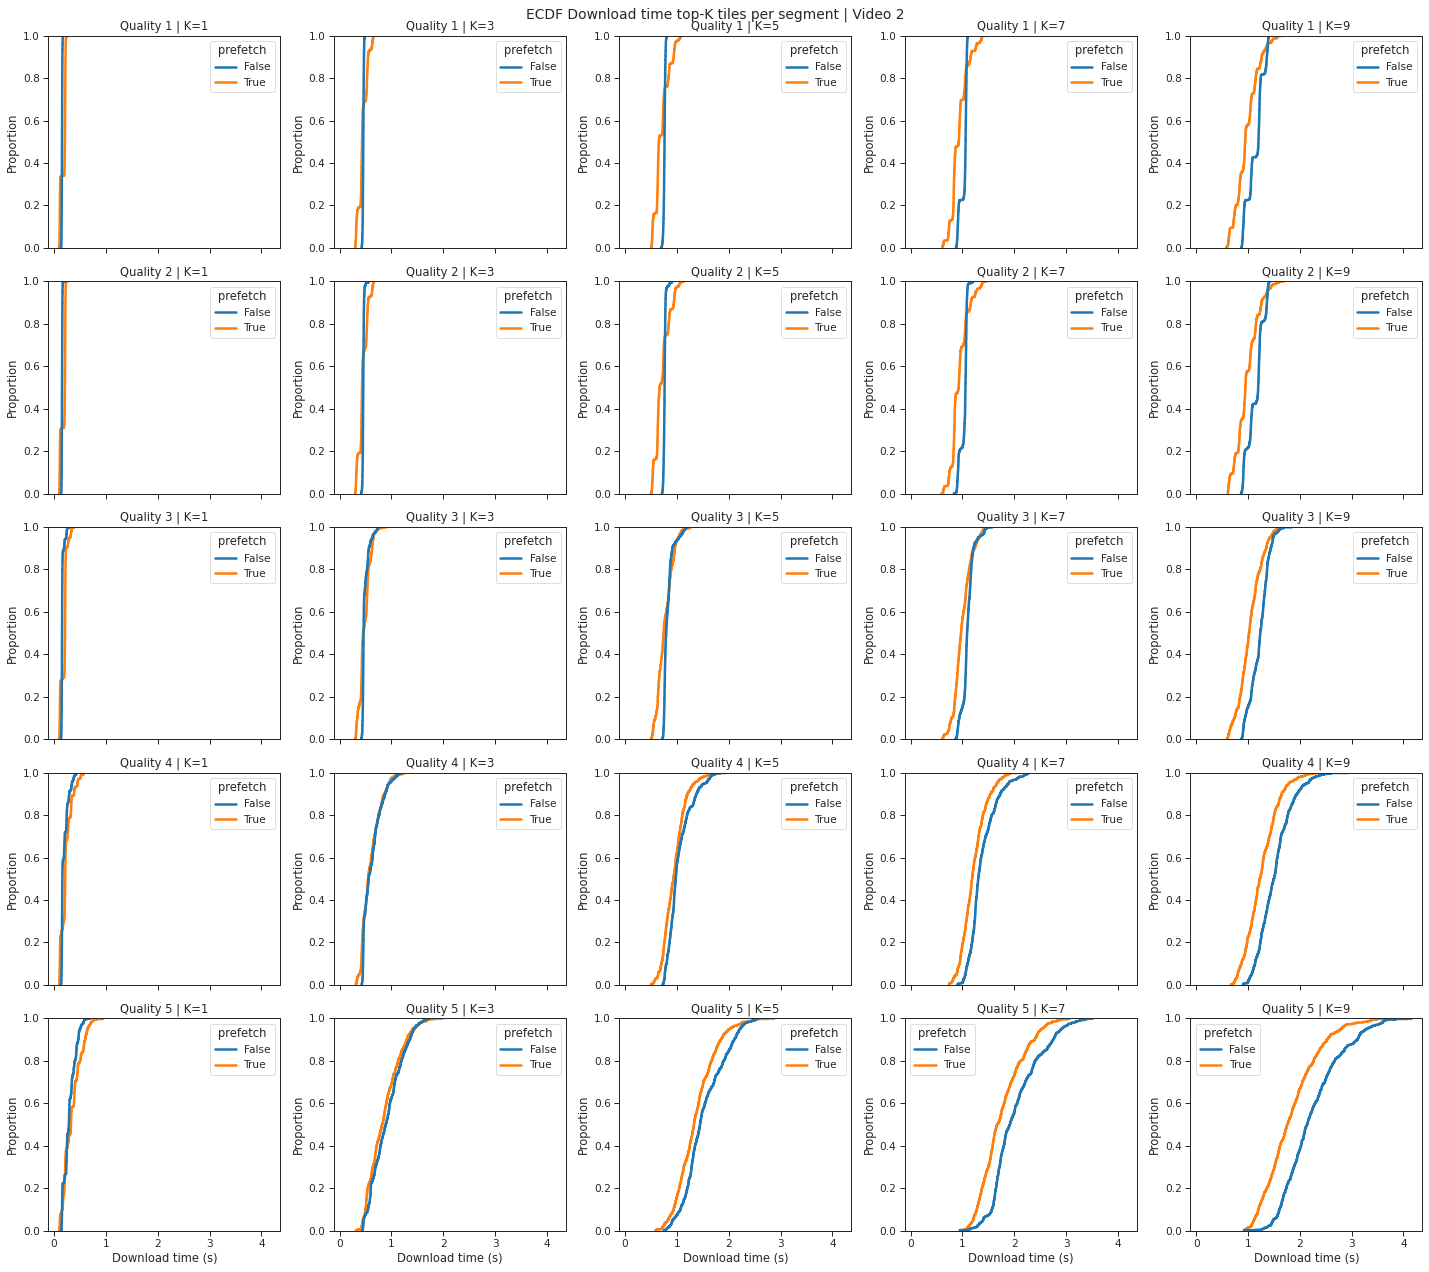

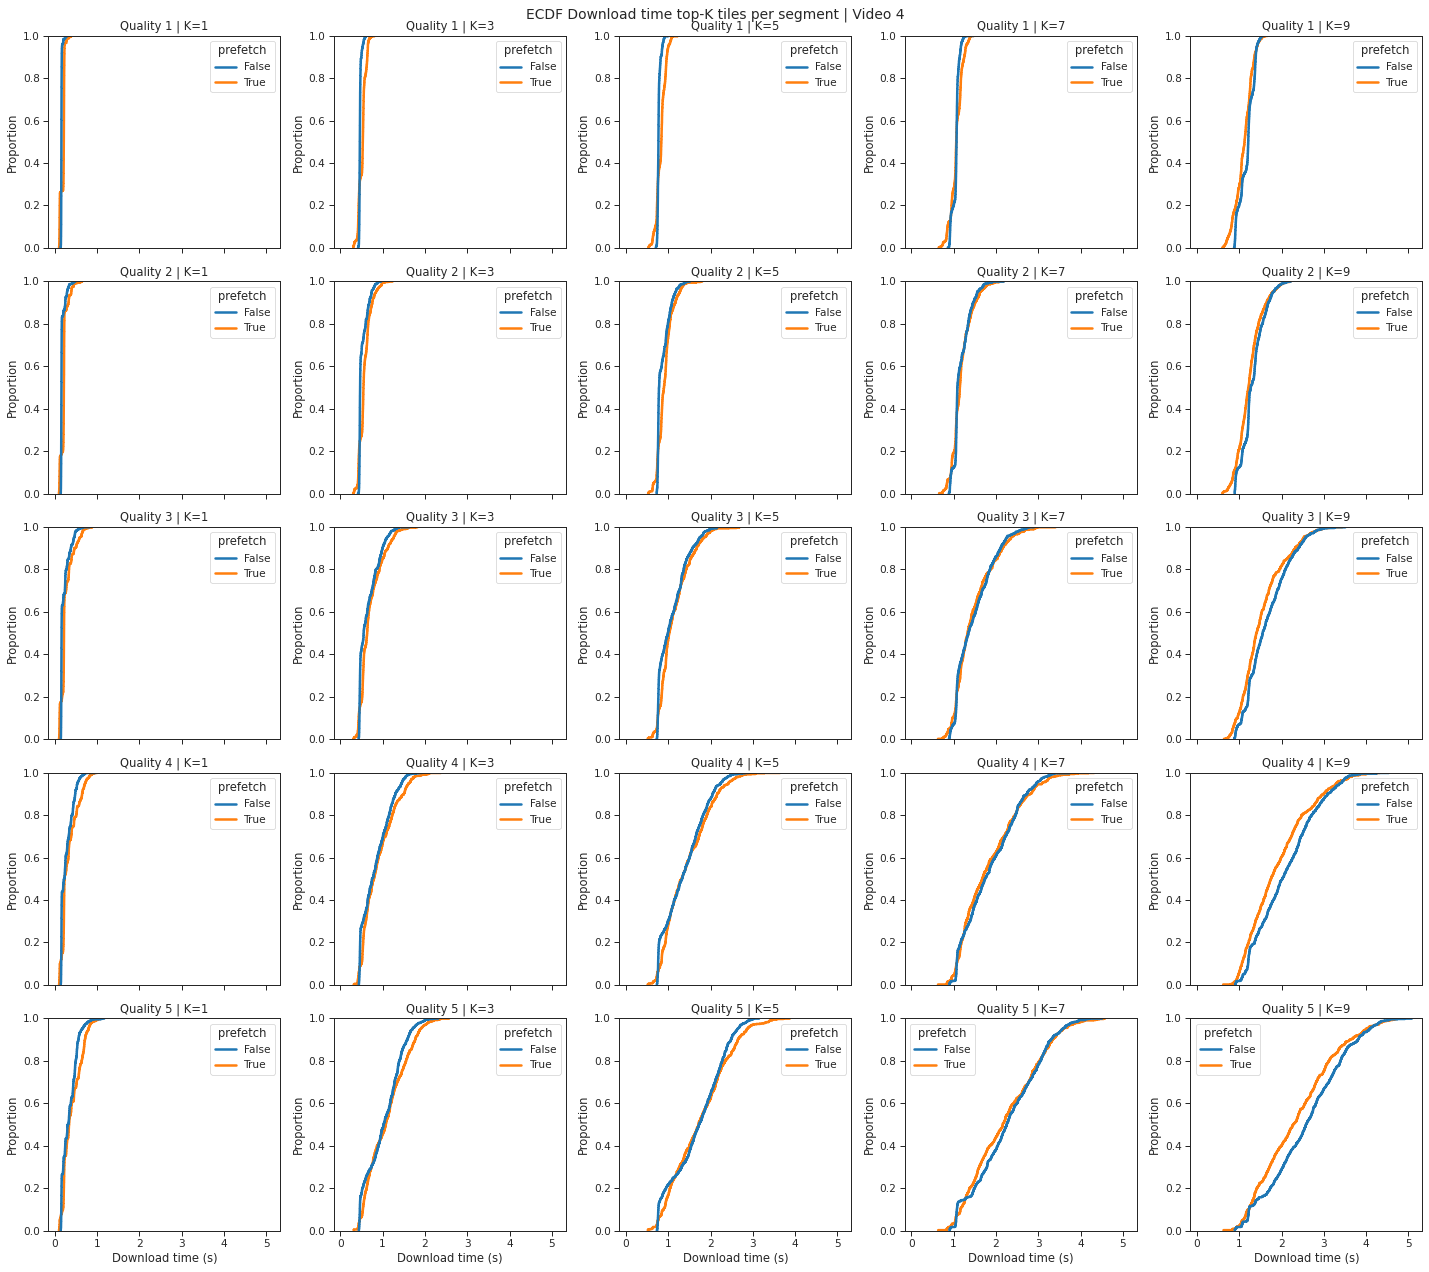

In [6]:
for v in v_unique:
    fig, axes = plt.subplots(len(QUALITIES), len(k_unique), figsize=(20,18), sharex=True)
    for k in range(len(k_unique)):
#         fig.delaxes(axes[1][2])
        for i in range(len(QUALITIES)):
#             axis = axes[i//3][i%3]
            axis = axes[i][k]
            sns.ecdfplot(data=results_df[(results_df['video'] == v) & (results_df['k'] == k_unique[k]) & (results_df['quality'] == i+1)], x="seg_resp_time", linewidth=2.5, hue="prefetch", ax=axis)
            axis.set_title(f'Quality {i+1} | K={k_unique[k]}')
            axis.set_xlabel('Download time (s)')

    plt.suptitle(f'ECDF Download time top-K tiles per segment | Video {v}')
    plt.tight_layout()

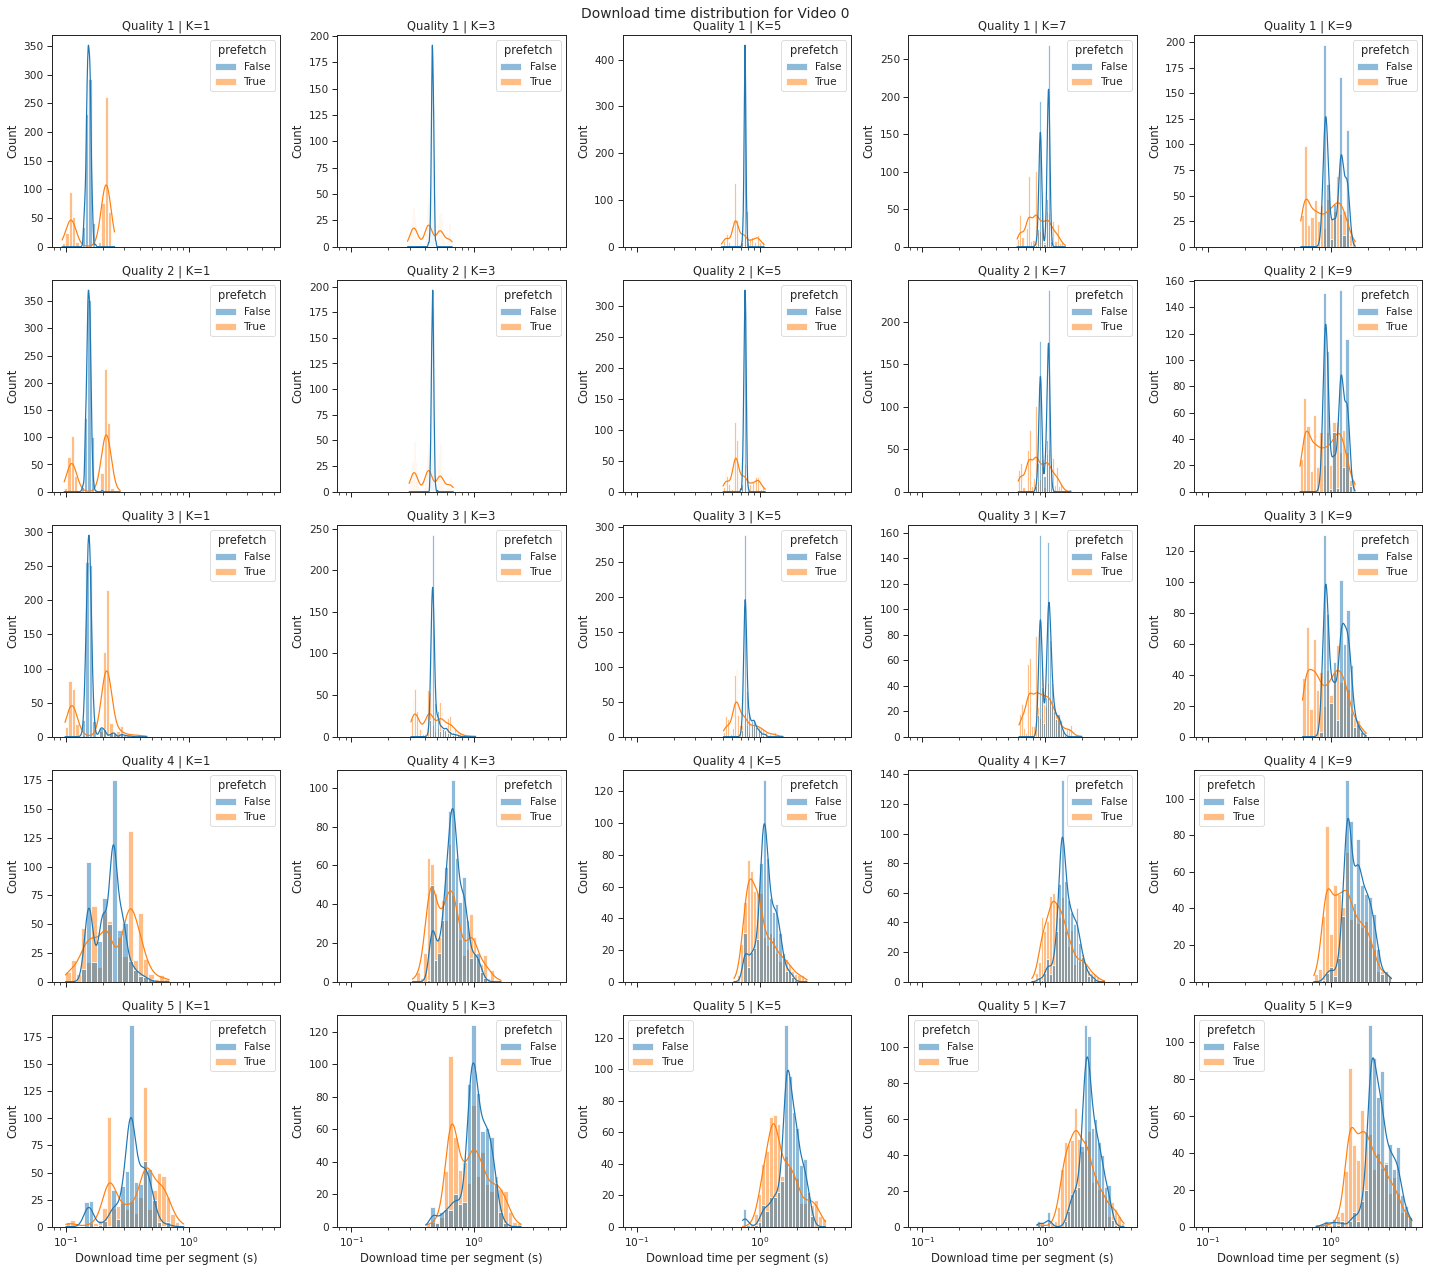

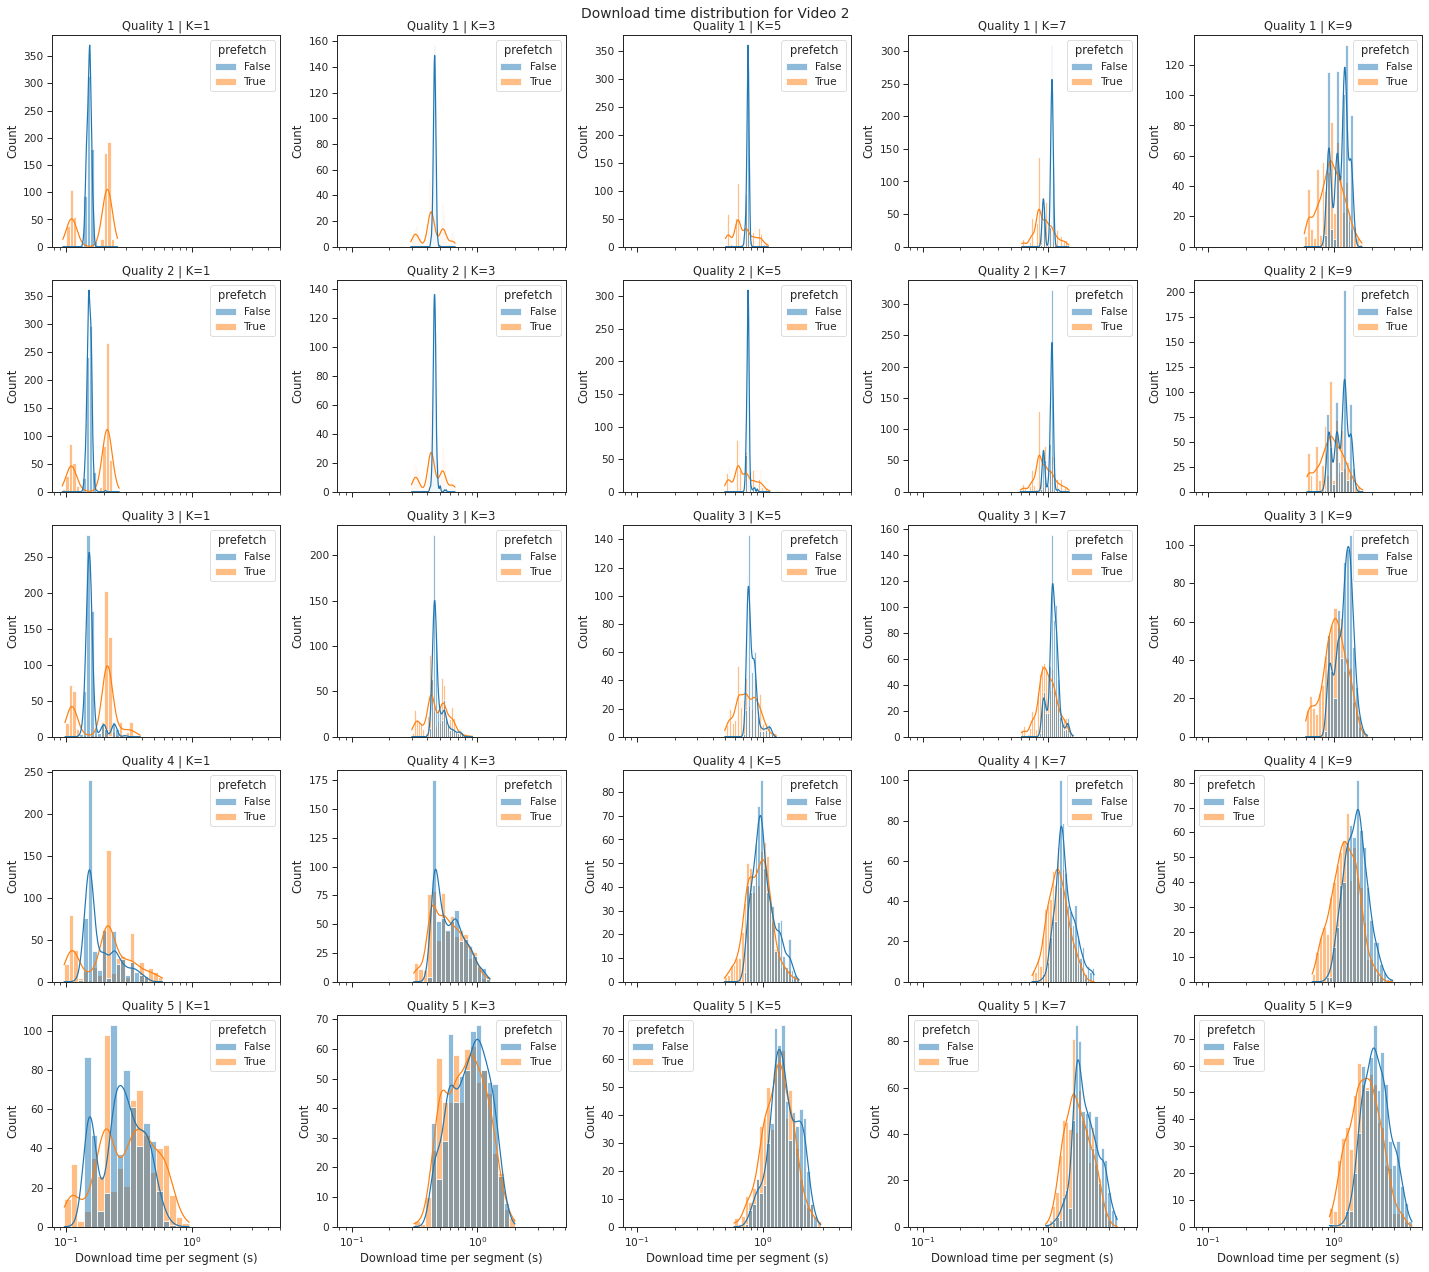

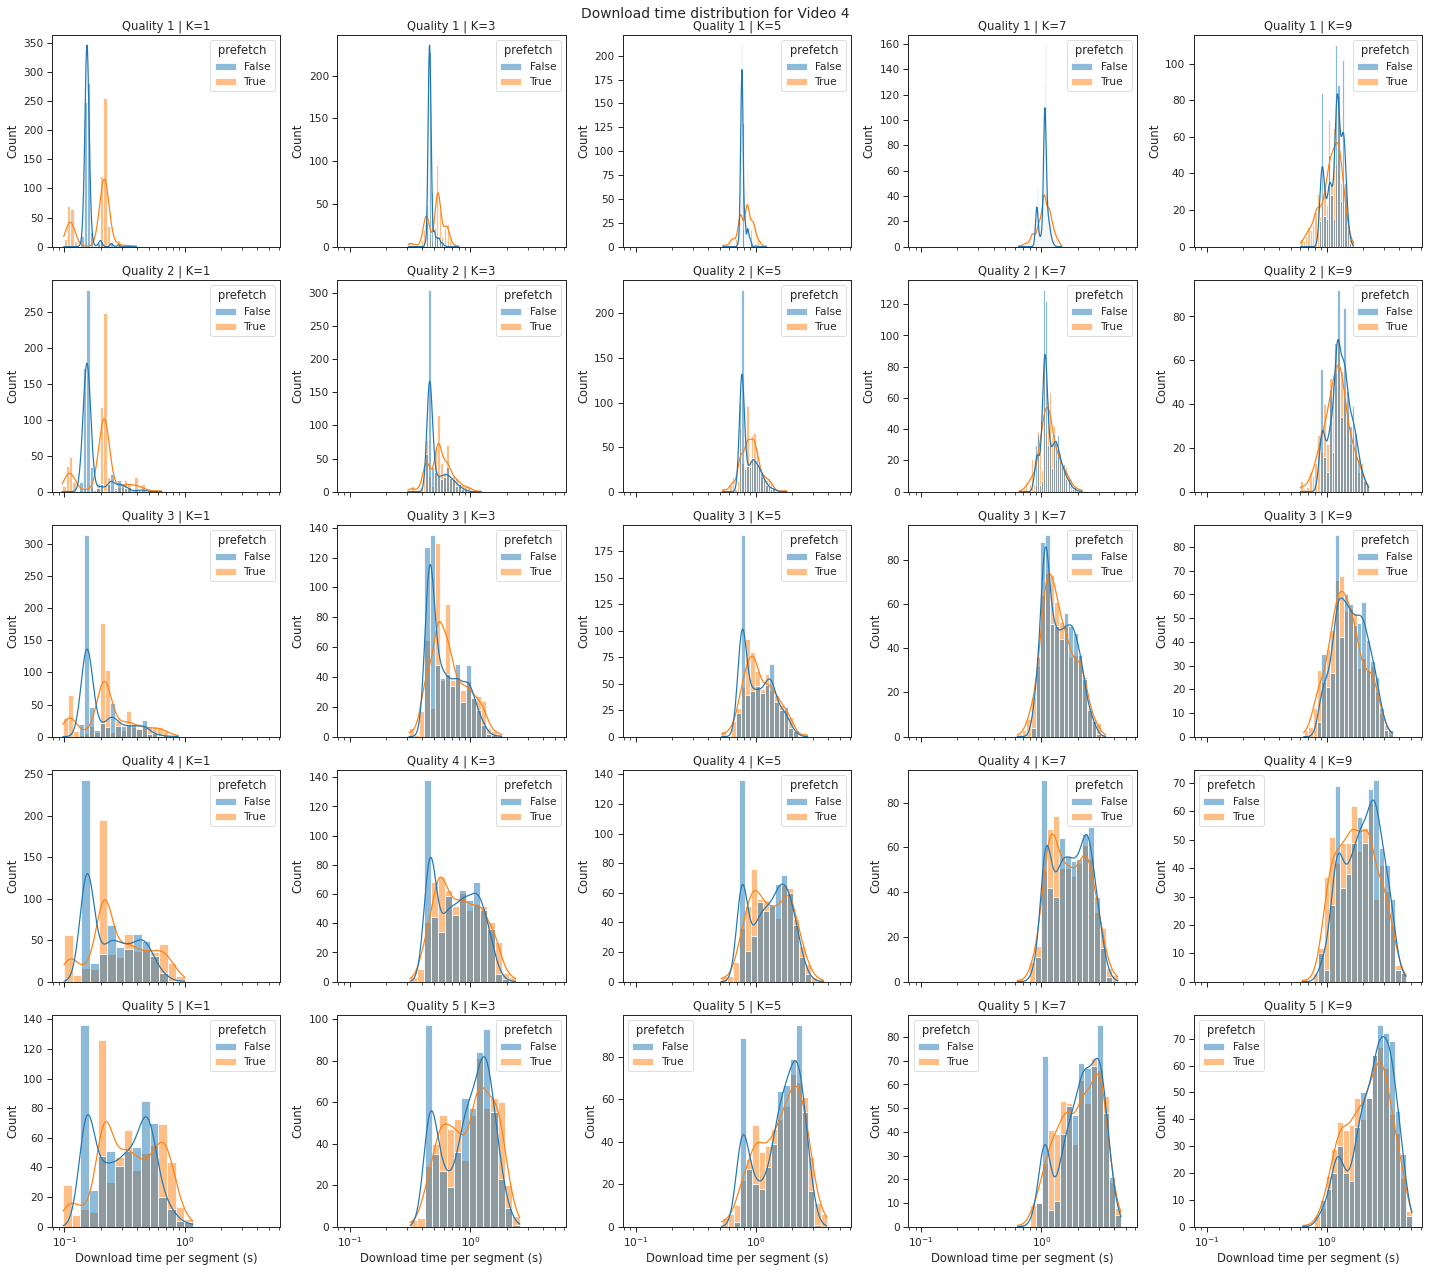

In [7]:
for v in v_unique:
    fig, axes = plt.subplots(len(QUALITIES), len(k_unique), figsize=(20,18), sharex=True)
    for k in range(len(k_unique)):
#         fig.delaxes(axes[1][2])
        for i in range(len(QUALITIES)):
#             axis = axes[i//3][i%3]
            axis = axes[i][k]
            axis.set_xscale("log")
            sns.histplot(data=results_df[(results_df['video'] == v) & (results_df['k'] == k_unique[k]) & (results_df['quality'] == i+1)], x="seg_resp_time", hue="prefetch", kde=True, ax=axis)
            axis.set_title(f'Quality {i+1} | K={k_unique[k]}')
            axis.set_xlabel('Download time per segment (s)')

    plt.suptitle(f'Download time distribution for Video {v}')
    plt.tight_layout()

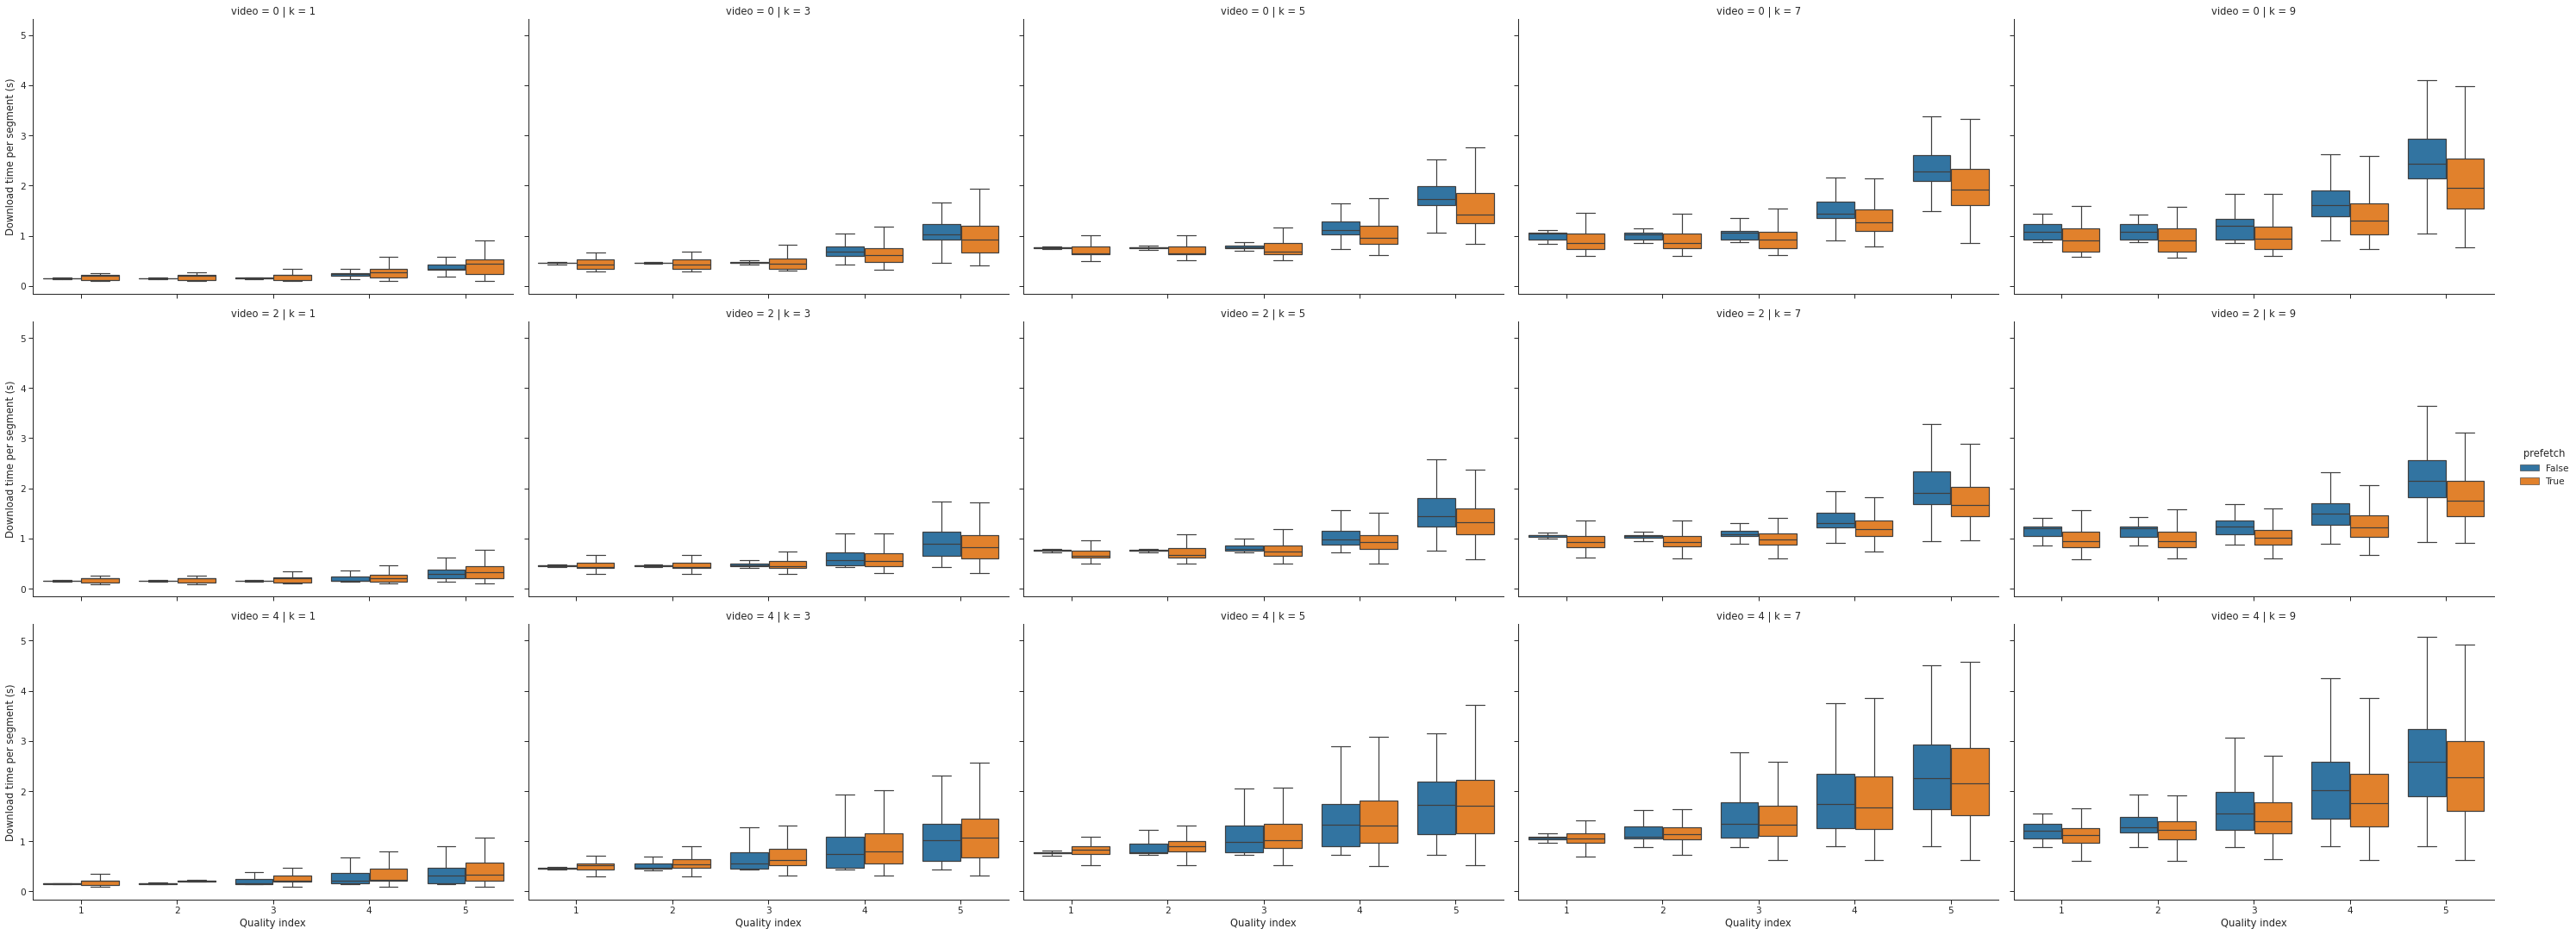

In [8]:
ax = sns.catplot(x="quality", 
                 y="seg_resp_time", 
                 hue="prefetch", 
                 data=results_df, 
                 kind="box",
                 height=5, 
                 aspect=1.618,
                 showfliers = False,
                 row ="video",
                 col ='k'
                )
ax.set_axis_labels("Quality index", "Download time per segment (s)")

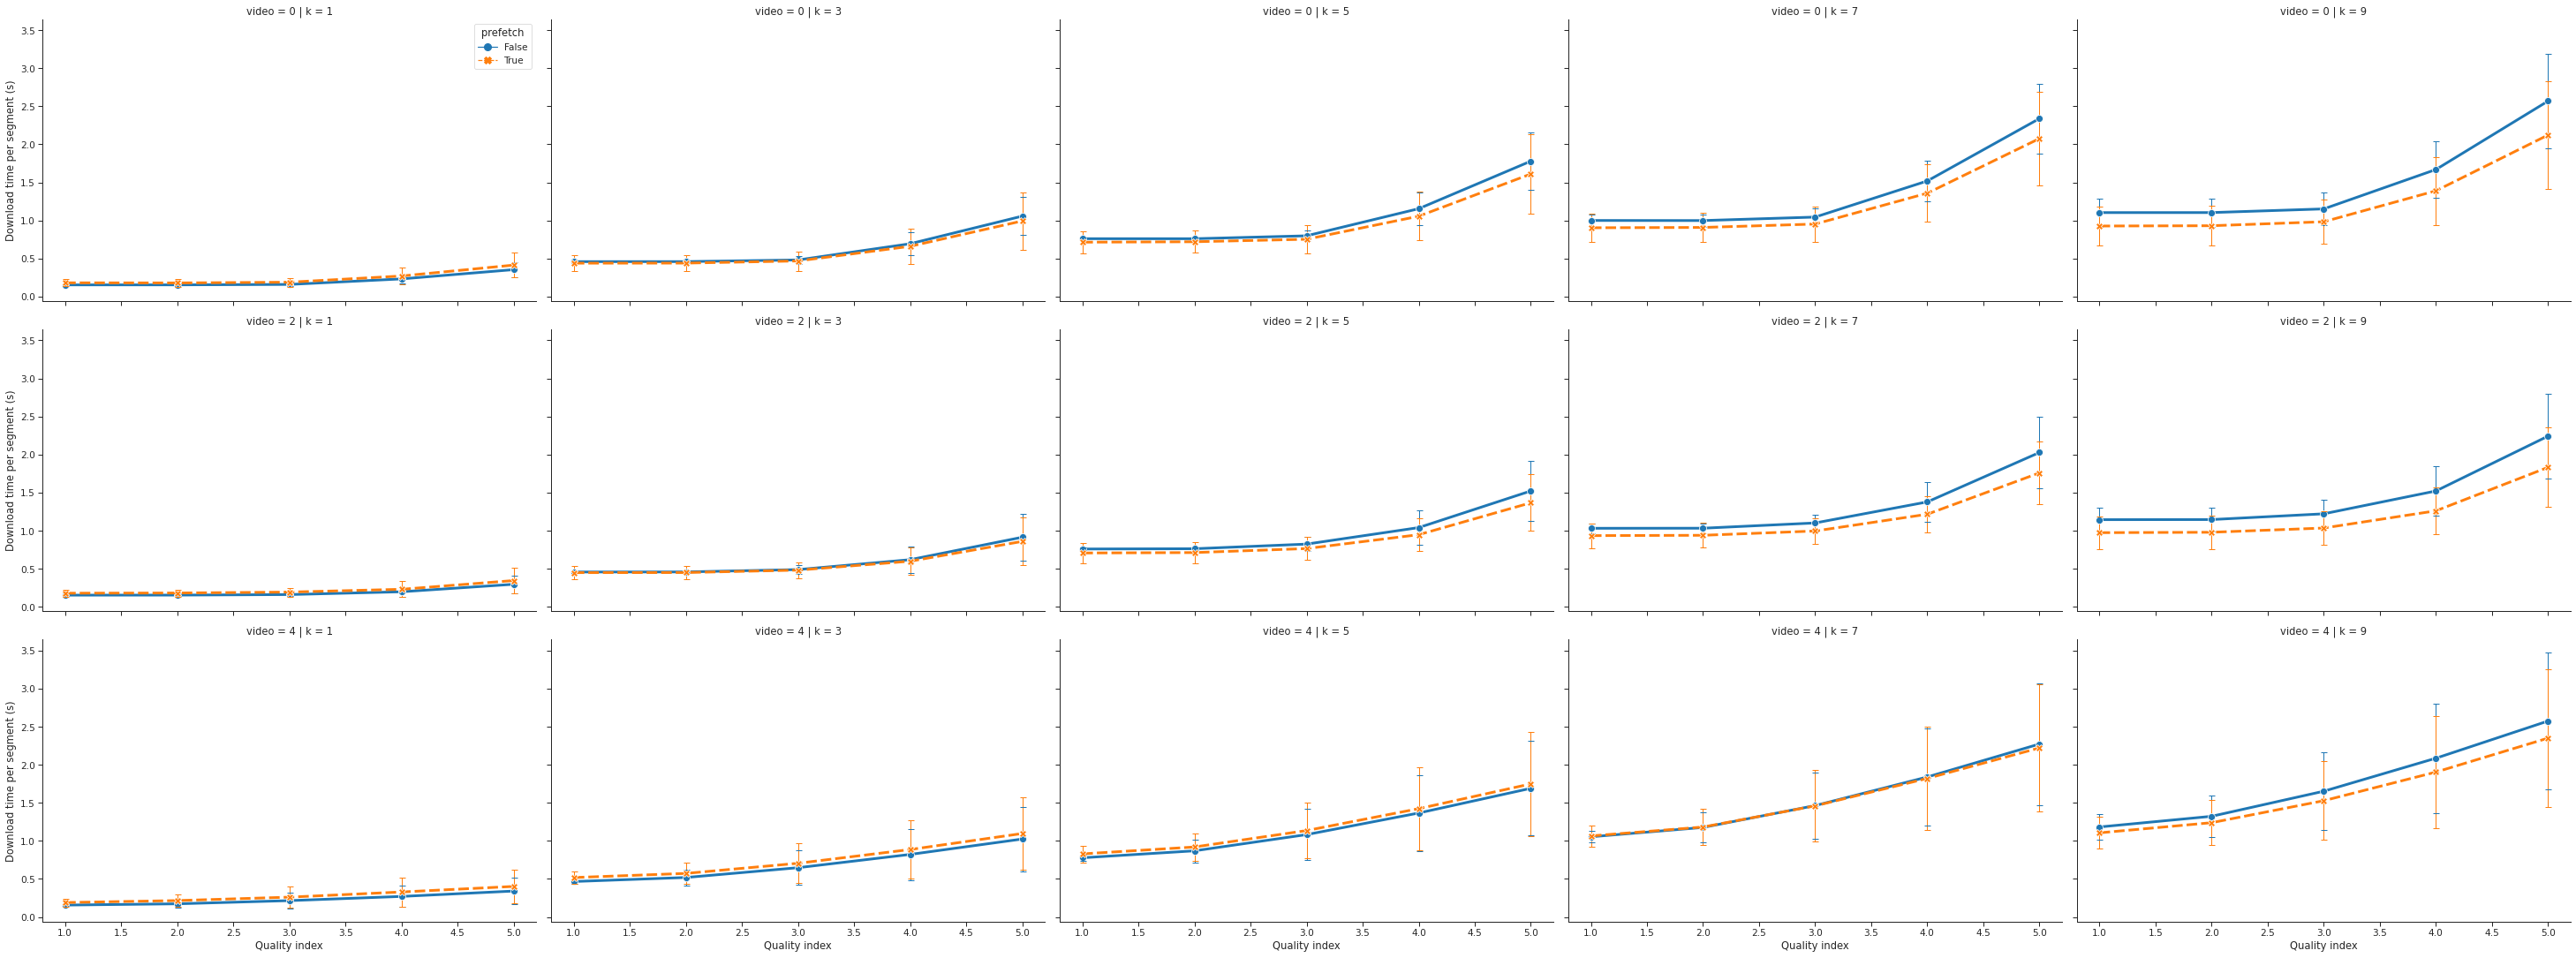

In [9]:
# sns.set_style('ticks', {'axes.grid': False})
# sns.set_context("paper", font_scale=1.5, rc={'lines.markersize': 8})

ax = sns.relplot(x="quality", 
                 y="seg_resp_time", 
                 hue="prefetch",
                 style='prefetch',
                 data=results_df, 
                 kind="line",
                 height=5, 
                 aspect=1.618,
                 row ="video",
                 col ='k',
                 err_style='bars', 
                 err_kws={"elinewidth": 1.0, "capsize": 3.5}, 
                 ci='sd', 
                 markers=True,
                 linewidth=3,
                 facet_kws = {'legend_out': False}
                )
ax.set_axis_labels("Quality index", "Download time per segment (s)")

In [10]:
# SERVER_PREFETCH_TMPL = 'issued_queries_prefetch_k{k}_v{video}.log'
# SERVER_NO_PREFETCH_TMPL = 'issued_queries_no_prefetch_k{k}_v{video}.log'

In [11]:
# server_logs = []
# prefetch_flag = False
# for v in v_unique:
#     for k in k_unique:
#         for file_tmpl in [SERVER_PREFETCH_TMPL, SERVER_NO_PREFETCH_TMPL]:
#             prefetch_flag = not prefetch_flag
#             tmp_df = pd.read_csv(f'{LOGS_PATH}/{file_tmpl.format(k=k, video=v)}', sep='|')
#             tmp_df['prefetch'] = prefetch_flag
#             tmp_df['k'] = k
#             server_logs.append(tmp_df)
            
# server_logs_df = pd.concat(server_logs, ignore_index=True)
server_logs_df = pd.read_csv(f'{LOGS_PATH}/issued_queries.log', sep='|')

In [12]:
server_logs_df

,date,video,quality,filename,k,prefetch
0,"2021-03-11 20:00:35,256",0,1,seg_dash_track14_1.m4s,1,True
1,"2021-03-11 20:00:35,380",0,1,seg_dash_track5_1.m4s,1,True
2,"2021-03-11 20:00:35,386",0,1,seg_dash_track14_2.m4s,1,True
3,"2021-03-11 20:00:35,475",0,1,seg_dash_track13_2.m4s,1,True
4,"2021-03-11 20:00:35,589",0,1,seg_dash_track13_3.m4s,1,True
...,...,...,...,...,...,...
513586,"2021-03-13 00:02:44,675",4,5,seg_dash_track6_100.m4s,9,False
513587,"2021-03-13 00:02:45,049",4,5,seg_dash_track4_100.m4s,9,False
513588,"2021-03-13 00:02:45,337",4,5,seg_dash_track3_100.m4s,9,False
513589,"2021-03-13 00:02:45,717",4,5,seg_dash_track8_100.m4s,9,False


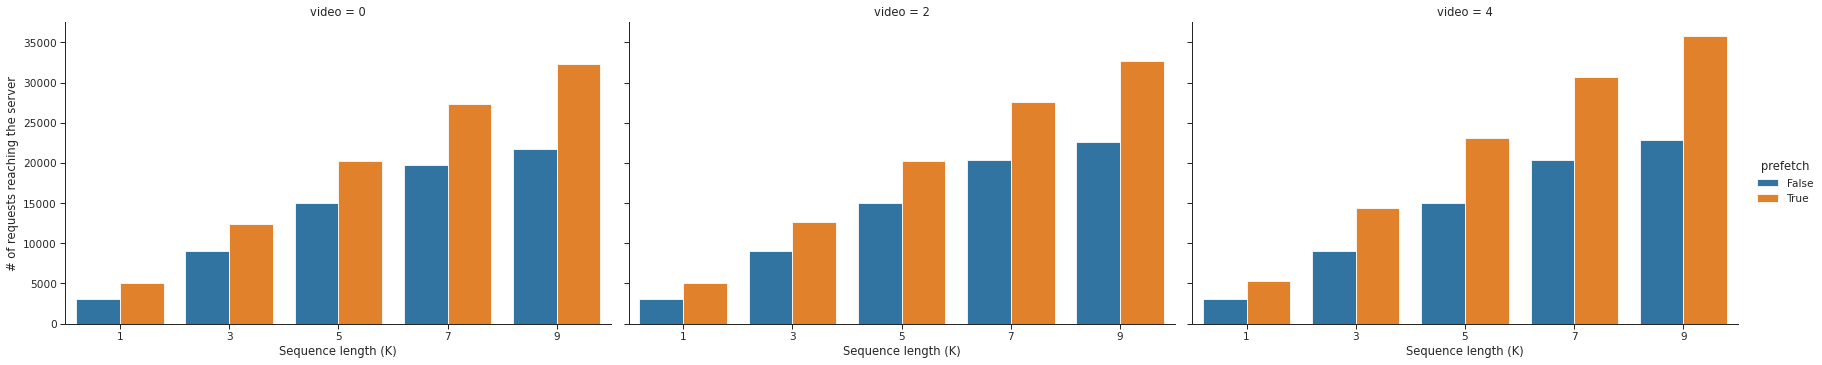

In [13]:
ax = sns.catplot(x="k", 
                 hue="prefetch", 
                 data=server_logs_df, 
                 kind="count",
                 height=5, 
                 aspect=1.618,
                 col ="video"
                )
ax.set_axis_labels("Sequence length (K)", "# of requests reaching the server")

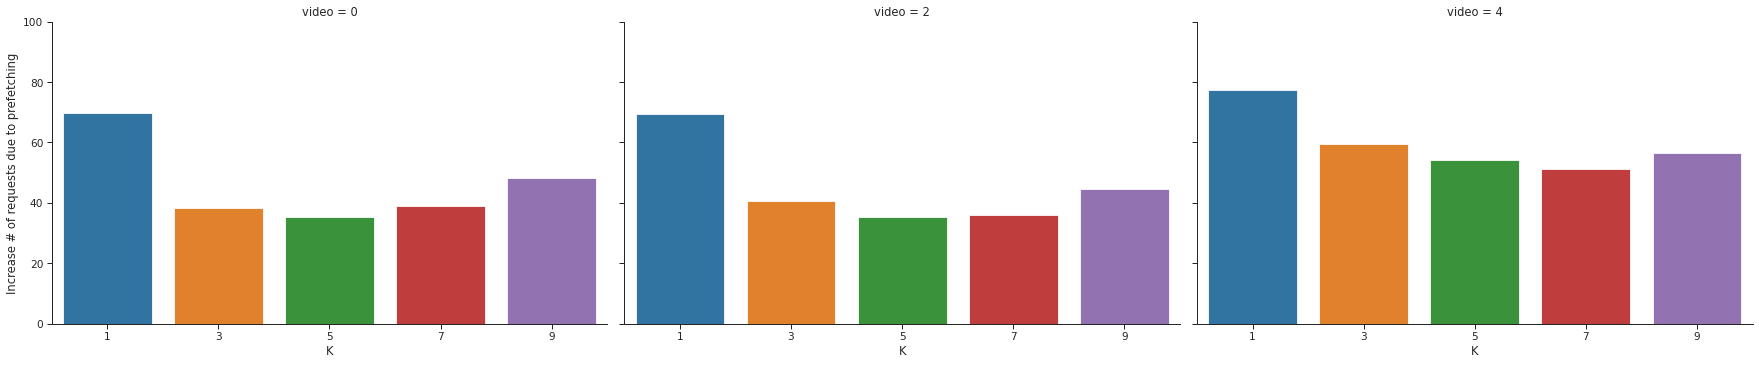

In [14]:
rel_req_inc = server_logs_df.groupby(['video', 'k', 'prefetch']).count()[['date']].pct_change().reset_index()
rel_req_inc = rel_req_inc[rel_req_inc['prefetch'] == True].rename(columns={'date': 'rel_increase'})
rel_req_inc['rel_increase'] = rel_req_inc['rel_increase'] * 100

ax = sns.catplot(x="k", 
                 y="rel_increase", 
                 data=rel_req_inc, 
                 kind="bar",
                 height=5, 
                 aspect=1.618,
                 col ="video"
                )
ax.set_axis_labels("K", "Increase # of requests due to prefetching").set(ylim=(0, 100))